# Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # Explore the files in the system
import matplotlib.pylab as plt # For Visualization
import tensorflow as tf
import tensorflow_hub as hub  
import cv2

## Analyzing the Dataset

In [2]:
#Display the folders in the dataset
data_dir = 'rice_leaf_diseases'
os.listdir(data_dir)

['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut']

In [3]:
#Display the names of images present in the folder 'rice_leaf_diseases'
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

DSC_0365.JPG
DSC_0366.jpg
DSC_0367.JPG
DSC_0370.jpg
DSC_0372.JPG
DSC_0373.JPG
DSC_0374.JPG
DSC_0375.JPG
DSC_0376.JPG
DSC_0377.JPG
DSC_0378.JPG
DSC_0379.JPG
DSC_0380.JPG
DSC_0381.JPG
DSC_0382.JPG
DSC_0383.JPG
DSC_0384.JPG
DSC_0385.jpg
DSC_0386.JPG
DSC_0388.JPG
DSC_0389.JPG
DSC_0390.JPG
DSC_0392.JPG
DSC_0393.JPG
DSC_0395.JPG
DSC_0396.JPG
DSC_0397.JPG
DSC_0398.JPG
DSC_0399.JPG
DSC_0400.JPG
DSC_0401.JPG
DSC_0402.JPG
DSC_0403.JPG
DSC_0404.JPG
DSC_0405.JPG
DSC_0406.JPG
DSC_0700.jpg
DSC_0701.jpg
DSC_0702.jpg
DSC_0703.JPG
DSC_0100.jpg
DSC_0101.jpg
DSC_0104.jpg
DSC_0105.jpg
DSC_0106.jpg
DSC_0107.jpg
DSC_0108.jpg
DSC_0109.jpg
DSC_0110.jpg
DSC_0111.jpg
DSC_0112.jpg
DSC_0113.jpg
DSC_0114.jpg
DSC_0115.jpg
DSC_0116.jpg
DSC_0117.jpg
DSC_0118.jpg
DSC_0119.jpg
DSC_0121.jpg
DSC_0292.JPG
DSC_0295.JPG
DSC_0296.jpg
DSC_0299.JPG
DSC_0300.JPG
DSC_0301.JPG
DSC_0302.JPG
DSC_0303.JPG
DSC_0304.JPG
DSC_0305.JPG
DSC_0306.JPG
DSC_0307.JPG
DSC_0323.JPG
DSC_0324.JPG
DSC_0325.JPG
DSC_0329.jpg
DSC_0332.JPG
DSC_0333.JPG

In [4]:
#Read Images using OpenCv to the name images
cv2.imread(os.path.join('rice_leaf_diseases', 'Brown_spot', 'DSC_0100.jpg'))
images = cv2.imread(os.path.join('rice_leaf_diseases', 'Brown_spot', 'DSC_0100.jpg'))
images.shape

(250, 766, 3)

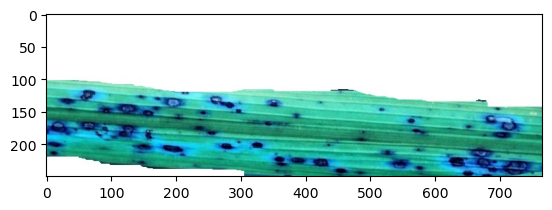

In [5]:
# Display an image from the selected dataset
plt.imshow(images)

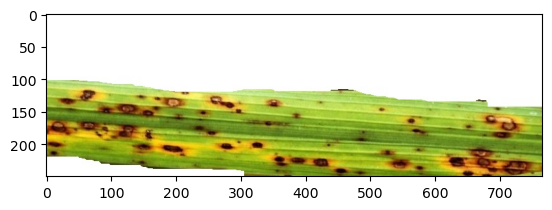

In [6]:
#Color correction using cv2
plt.imshow(cv2.cvtColor(images, cv2.COLOR_BGR2RGB))

# Load Dataset for the Project

In [32]:
#Generates a `tf.data.Dataset` from image files in a directory.
tf.keras.utils.image_dataset_from_directory??


In [8]:
#Add the rice_disease dataset into a variable called dataset
#image_dataset_from_directory automatically resizes images into appropriate size and make the images into batches
dataset = tf.keras.utils.image_dataset_from_directory('rice_leaf_diseases')

Found 120 files belonging to 3 classes.


In [9]:
#Data is not preloaded into memory. It is generated on the go. So inorder to Grab the data, convert it into a numpy iterator 
#Useful when dealing with massive data
data_iterator = dataset.as_numpy_iterator()

In [33]:
#Accessing consecuitive data batches generator from  data pipeline
#Get another batch from the iterator
batch = data_iterator.next()

In [34]:
#showing dta batch as numpy array
batch

(array([[[[236.87845 , 227.87845 , 222.87845 ],
          [236.58653 , 226.58653 , 224.58653 ],
          [237.      , 226.      , 224.      ],
          ...,
          [236.      , 226.4961  , 221.74805 ],
          [236.11269 , 225.11269 , 219.11269 ],
          [234.8696  , 225.8696  , 218.8696  ]],
 
         [[236.      , 227.      , 222.      ],
          [237.      , 228.      , 223.      ],
          [238.3115  , 227.3115  , 223.3115  ],
          ...,
          [236.      , 225.      , 219.      ],
          [237.      , 226.      , 220.      ],
          [234.75586 , 225.75586 , 220.75586 ]],
 
         [[237.13445 , 227.13445 , 225.13445 ],
          [237.33109 , 228.33109 , 223.33109 ],
          [238.74023 , 229.74023 , 224.74023 ],
          ...,
          [236.84729 , 225.84729 , 219.84729 ],
          [236.      , 225.      , 219.      ],
          [236.38313 , 225.38313 , 221.38313 ]],
 
         ...,
 
         [[237.      , 226.      , 222.      ],
          [236.143

In [35]:
#2 parts to the dataset: images from directory loaded as numpy array and labels of the images, indicate the length of batch to be 2
len(batch)

2

In [36]:
#Images represented as Numpy Arrays
#256 implies the size
#3 implies it is color image
#32 imlies the size of the batch. 32 images.
batch[0].shape

(32, 256, 256, 3)

In [37]:
#0, 1 and 2 represents 3 different types of diseases in leaves
batch[1]

array([1, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 0])

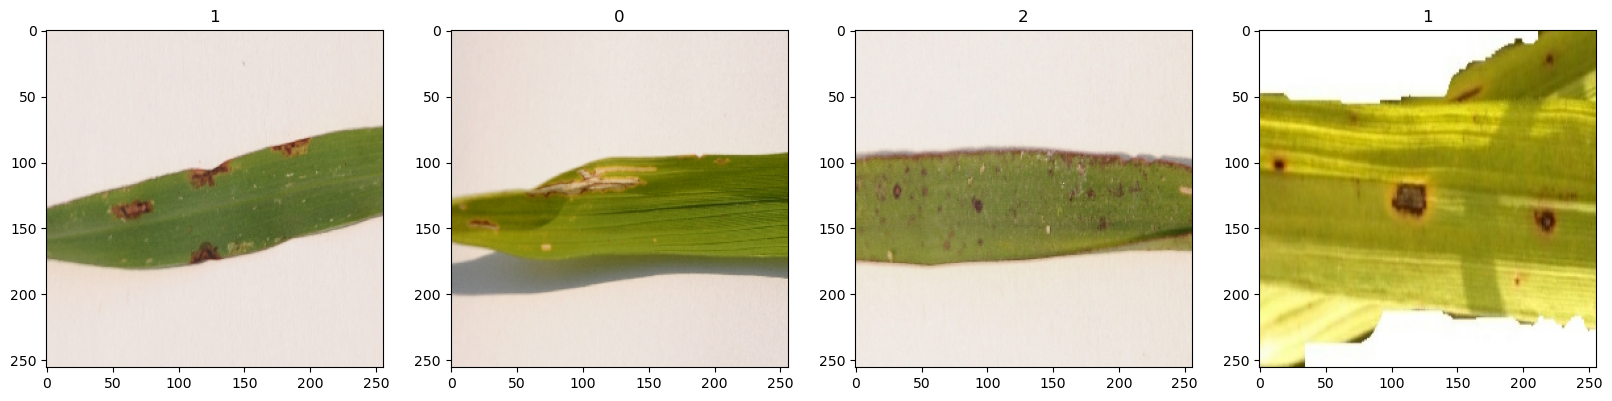

In [38]:
# Class 0: Bacterial Leaf Blight
# Class 1: Brown Spot
# Class 2: Leaf smut
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Pre-processing

## Split the data

In [16]:
#Implies that we have 4 batches of data and each batch contains 32 images. last batch can be 32 or less number of images. 4*32 = 128..but we know we have 120 images
len(dataset)

4

In [42]:
#SPlitting data into Training, Testing and Validating sets
#training data should be 70% of the data
train_size = int(len(dataset)*.7)
val_size = int(len(dataset)*.2)
test_size = int(len(dataset)*.1)

In [43]:
train_size

2

In [44]:
val_size

0

In [45]:
test_size

0

In [21]:
#Train_size + test_size + val_size = 4

In [22]:
#take and skip methods are available in the tensorflow dataset pipeline 
#take defines how much data we are going to take in the particular partition
#skip whatever data used for train and validation
train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size+val_size).take(test_size)

# Training

In [23]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
#Import dependencies to build model
from tensorflow.keras.models import Sequential
#2D convolutional layer, max pooling layer condenses the images
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [25]:
#go through the batches with layers in a sequential manner
model = Sequential()

In [26]:
#convolution has 16 filters 3 pixels and moves 1 pixels each time and it extract relevant info from images to do classification  
#relu activation for preserving positive values. negative values are taken as zero
#Reshaping using 'activation'
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
#take maximum value after relu activation and return that value
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
#final layer will be single and represented as 0, 1 or 2
model.add(Dense(1, activation='sigmoid'))

In [27]:
#Use adam optimizer from kera
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Testing

In [29]:
#Creating Log Directory
logdir='logs'


In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [46]:
#model.fit training component 
#epochs how long to train for
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
2/2 [==============================] - 2s 637ms/step - loss: -1071.4043 - accuracy: 0.3906
Epoch 2/20
2/2 [==============================] - 1s 607ms/step - loss: -523.5681 - accuracy: 0.3594
Epoch 3/20
2/2 [==============================] - 1s 564ms/step - loss: -605.2534 - accuracy: 0.3281
Epoch 4/20
2/2 [==============================] - 1s 534ms/step - loss: -770.6439 - accuracy: 0.2812
Epoch 5/20
2/2 [==============================] - 1s 529ms/step - loss: -368.7817 - accuracy: 0.2969
Epoch 6/20
2/2 [==============================] - 1s 530ms/step - loss: -1190.7073 - accuracy: 0.3438
Epoch 7/20
2/2 [==============================] - 1s 497ms/step - loss: 369.3278 - accuracy: 0.3906
Epoch 8/20
2/2 [==============================] - 1s 505ms/step - loss: -335.7449 - accuracy: 0.3594
Epoch 9/20
2/2 [==============================] - 1s 509ms/step - loss: -1734.9448 - accuracy: 0.5625
Epoch 10/20
2/2 [==============================] - 1s 534ms/step - loss: -2307.5952 - acc

# Plot Performance